<a href="https://colab.research.google.com/github/vitroid/PythonTutorials/blob/master/Pending/%E8%89%B2%E3%81%AE%E5%8F%8D%E8%BB%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
# Fetch あ.png
! wget https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/A_cat_on_a_motorcycle_in_the_medina_of_Tunis_20171017_131525.jpg/300px-A_cat_on_a_motorcycle_in_the_medina_of_Tunis_20171017_131525.jpg

--2023-04-26 05:28:39--  https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/A_cat_on_a_motorcycle_in_the_medina_of_Tunis_20171017_131525.jpg/300px-A_cat_on_a_motorcycle_in_the_medina_of_Tunis_20171017_131525.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26259 (26K) [image/jpeg]
Saving to: ‘300px-A_cat_on_a_motorcycle_in_the_medina_of_Tunis_20171017_131525.jpg’

300px-A_cat_on_a_mo 100%[===================>]  25.64K  --.-KB/s    in 0.006s  

2023-04-26 05:28:39 (3.90 MB/s) - ‘300px-A_cat_on_a_motorcycle_in_the_medina_of_Tunis_20171017_131525.jpg’ saved [26259/26259]



In [107]:
%pip install imageio[pyav]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 45.3 MB/s eta 0:00:00


<class 'numpy.ndarray'>
(217, 300, 3)


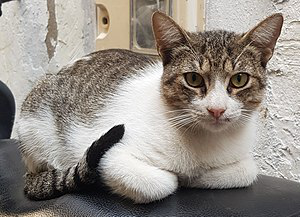

In [174]:
from skimage import io
from IPython.display import display

def Show(a):
    """
    2次元array aを画像として表示する。
    """
    from PIL import Image # 画像操作ライブラリ
    img = Image.fromarray(a)
    display(img)


A = io.imread('/content/300px-A_cat_on_a_motorcycle_in_the_medina_of_Tunis_20171017_131525.jpg')
print(type(A))

# 画像が、行列であることを確認する。
print(A.shape)
Show(A)

In [102]:
A

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

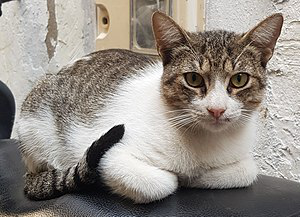

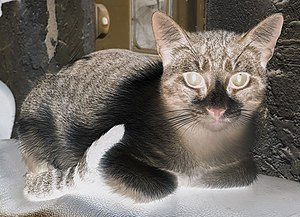

In [204]:
normalizedA = A.astype(float) - 128
B = np.array([1.0,1.0,1.0]) / (3**0.5)
# C = A - B*(A@B)*2
C = normalizedA@B
CC = np.zeros(A.shape)
CC[:,:,:] = B*2
CC *= C[:,:,np.newaxis]
D = A - CC
Dmin = np.min(D)
Dmax = np.max(D)
D = (D - Dmin)/(Dmax-Dmin)*255
Show(A)
Show(D.astype(np.uint8))